#Exploratory Data Analysis - Amazon Top 50 Bestselling Books 2009 - 2019

Data source: https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019

##Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

##Import Dataset

In [ ]:
books = pd.read_csv('books.csv')
books.tail(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


##Data and Business Understanding

In [ ]:
books.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [ ]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
books.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

Business Objective:
1. What is the average rating of the books?
2. What is the distribution of the number of reviews received by the books?
3. Which are the top 5 most expensive books?
4. What is the correlation between the rating and the price of the books?
5. What is the distribution of the genres of the books?

##Data Assesing and Cleaning

In [ ]:
#check if there are nulls/missing values
books.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
#check if there are duplicated data
books.duplicated().sum()

0

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
books.head()

In [ ]:
books = books.rename(columns = {
    'Name' : 'Title',
    'User Rating' : 'Rating'
})
books.head()

,Title,Author,Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


##EDA

In [ ]:
books.describe()

,Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
books.sort_values(by='Price', ascending=False).head(10) #datanya harus ordinal

,Title,Author,Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction


In [ ]:
books.groupby(by='Genre').agg({'Rating' : 'min'}) #datanya harus kategorik/diskrit

###Distribution Plot

<Axes: xlabel='Reviews', ylabel='Count'>

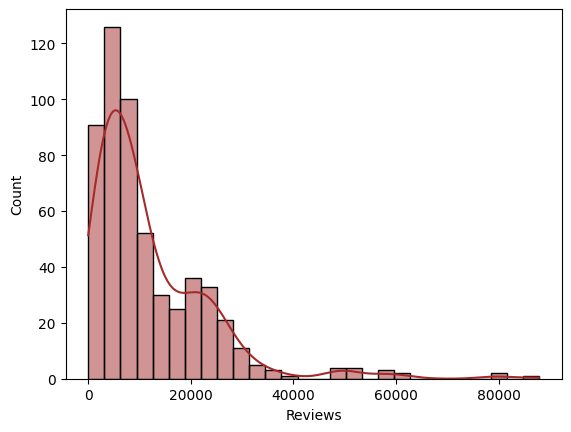

In [ ]:
sns.histplot(books['Reviews'], kde=True, color='brown')

<Axes: xlabel='Genre', ylabel='Count'>

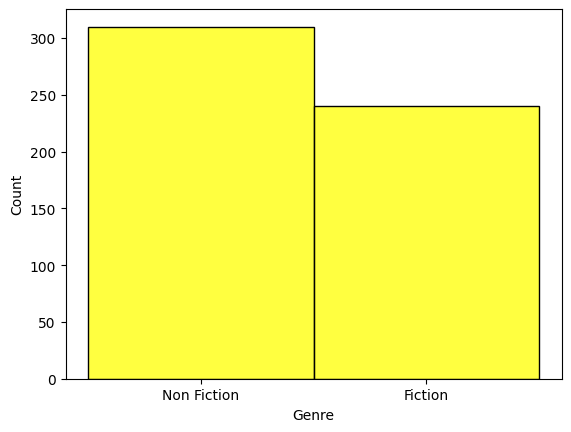

In [ ]:
sns.histplot(books['Genre'] , color='yellow')

In [ ]:
#jointplot
sns.jointplot(x='Price', y='Rating', data=books, kind='scatter', hue='Genre', palette='rainbow')

###Matrix Plot

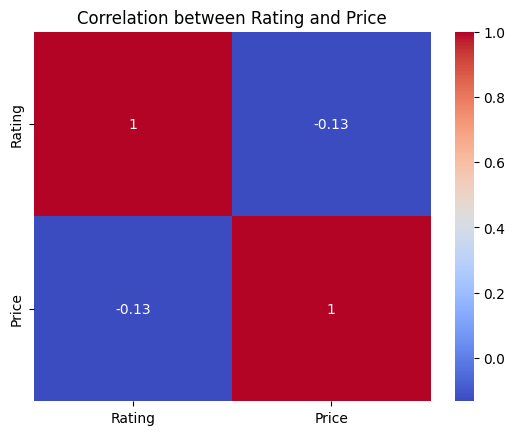

In [ ]:
corr_matrix = books[['Rating','Price']].corr()
#Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Rating and Price')
plt.show()

In [ ]:
correlations = books.corr()
sns.heatmap(correlations, annot=False, camp='rainbow')
plt.show

ValueError: could not convert string to float: '10-Day Green Smoothie Cleanse'

###Regression Plot

In [ ]:
books.head()

In [ ]:
sns.regplot(x='Year', y='Rating', data = books)